## Q2

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('mendota_secchi_depth.txt', delimiter='\t')
X = df['day_of_year']
y = df['secchi_depth']

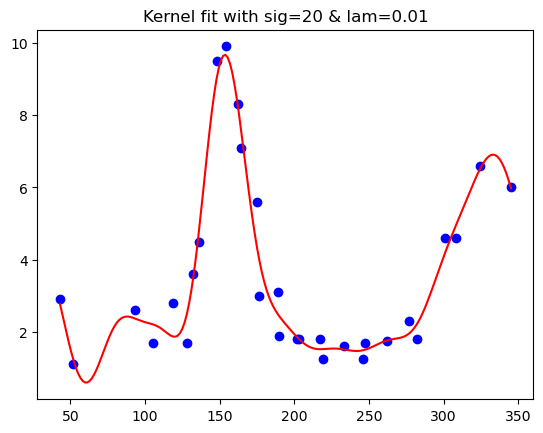

In [36]:
#2A
lam = 0.01
sig = 20
n = X.shape[0]

X_np = X.values if isinstance(X, pd.Series) else X.to_numpy()
X_np = X_np.reshape(-1, 1)

dist_sq = np.square(X_np[:, np.newaxis] - X_np).sum(axis=2)
K = np.exp(-dist_sq / (2 * sig**2))
alpha = np.linalg.inv(K + lam * np.identity(n)) @ y

p = 200
X_test = np.linspace(X_np.min(), X_np.max(), p).reshape(p, 1)
dist_xtest = np.square(X_test[:, np.newaxis] - X_np).sum(axis=2)
Ktest = np.exp(-dist_xtest / (2 * sig**2))
yhat = Ktest @ alpha

plt.plot(X_np, y, 'bo', label='Measured data')
plt.plot(X_test, yhat, 'r', label='Kernel fit')
plt.title("Kernel fit with sig=20 & lam=0.01")
plt.show()

In [37]:
#2B

#We can use cross validation to find good sigma and lambda values by first making a parameter grid
#of possible sigmas and lambdas to test. For each pair in this grid run an, 8fold in this case, CV.
#Then you pick the lam & sigs that have the best accuracy on the heldout test data